<a href="https://colab.research.google.com/github/griffinsykes/Portfolio/blob/main/HealthProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/colorectal_cancer_dataset.csv')
data.head()

,Patient_ID,Country,Age,Gender,Cancer_Stage,Tumor_Size_mm,Family_History,Smoking_History,Alcohol_Consumption,Obesity_BMI,...,Survival_5_years,Mortality,Healthcare_Costs,Incidence_Rate_per_100K,Mortality_Rate_per_100K,Urban_or_Rural,Economic_Classification,Healthcare_Access,Insurance_Status,Survival_Prediction
0,1,UK,77,M,Localized,69,No,No,Yes,Overweight,...,Yes,No,54413,50,5,Urban,Developed,Moderate,Insured,Yes
1,2,UK,59,M,Localized,33,No,No,No,Overweight,...,Yes,No,76553,37,25,Urban,Developing,High,Uninsured,Yes
2,3,Japan,66,M,Regional,17,No,Yes,No,Normal,...,Yes,No,62805,54,27,Urban,Developed,Moderate,Uninsured,No
3,4,USA,83,M,Regional,14,No,No,No,Obese,...,Yes,No,89393,45,11,Urban,Developed,Moderate,Insured,Yes
4,5,France,66,M,Localized,34,No,Yes,No,Normal,...,Yes,No,66425,15,27,Urban,Developing,High,Insured,Yes


In [ ]:
data = data.drop(['Patient_ID','Survival_Prediction','Mortality'], axis = 1)

In [ ]:
data.isnull().sum()

,0
Country,0
Age,0
Gender,0
Cancer_Stage,0
Tumor_Size_mm,0
Family_History,0
Smoking_History,0
Alcohol_Consumption,0
Obesity_BMI,0
Diet_Risk,0


In [ ]:
# @title
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167497 entries, 0 to 167496
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Country                     167497 non-null  object
 1   Age                         167497 non-null  int64 
 2   Gender                      167497 non-null  object
 3   Cancer_Stage                167497 non-null  object
 4   Tumor_Size_mm               167497 non-null  int64 
 5   Family_History              167497 non-null  object
 6   Smoking_History             167497 non-null  object
 7   Alcohol_Consumption         167497 non-null  object
 8   Obesity_BMI                 167497 non-null  object
 9   Diet_Risk                   167497 non-null  object
 10  Physical_Activity           167497 non-null  object
 11  Diabetes                    167497 non-null  object
 12  Inflammatory_Bowel_Disease  167497 non-null  object
 13  Genetic_Mutation            1

In [ ]:
from sklearn.model_selection import train_test_split
traindata, testdata = train_test_split(data, test_size=0.99, random_state = 42)
traindata.shape, testdata.shape

((1674, 25), (165823, 25))

In [ ]:
traindata.describe()

,Age,Tumor_Size_mm,Healthcare_Costs,Incidence_Rate_per_100K,Mortality_Rate_per_100K
count,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000
mean,69.016726,41.920550,72065.429510,34.633214,17.366189
std,12.006462,21.556532,27495.555014,14.223701,7.045855
min,31.000000,5.000000,25146.000000,10.000000,5.000000
25%,59.000000,24.000000,48446.500000,22.000000,12.000000
50%,69.000000,41.000000,70798.500000,36.000000,18.000000
75%,79.000000,61.000000,96519.500000,47.000000,23.000000
max,89.000000,79.000000,119986.000000,59.000000,29.000000


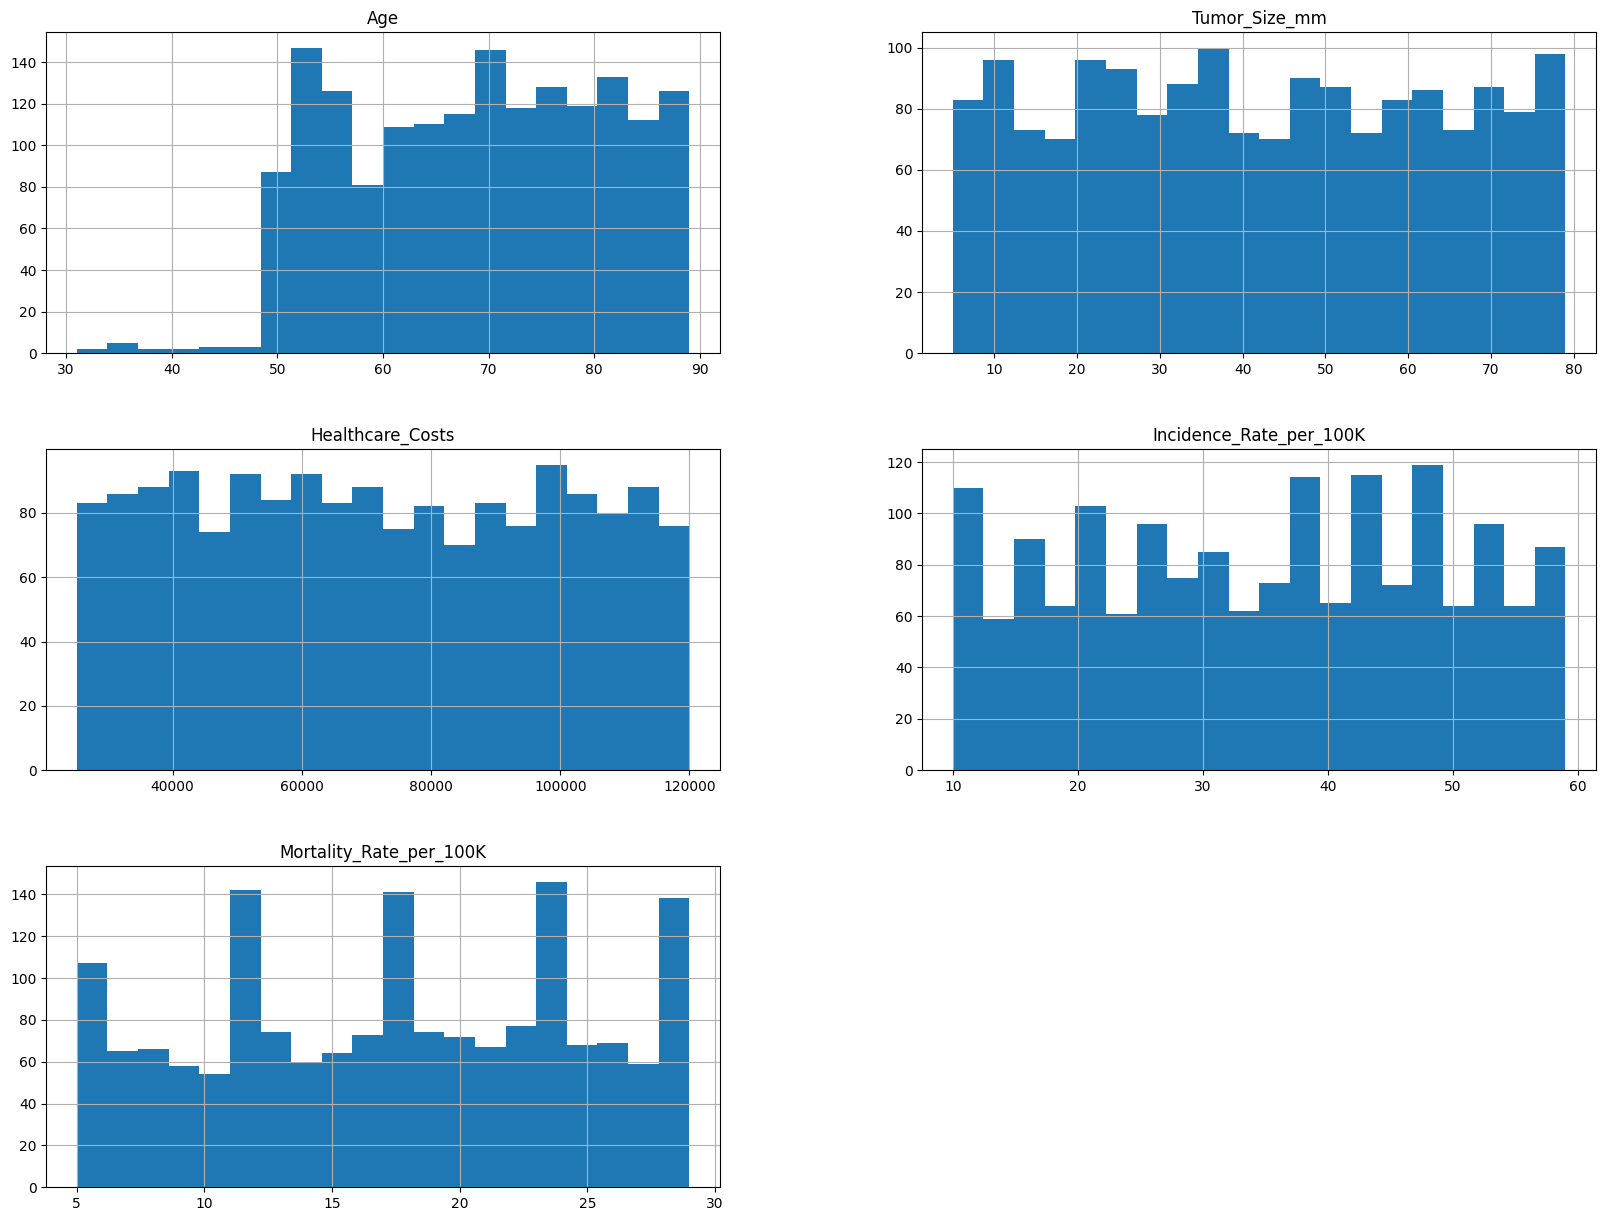

In [ ]:
traindata.hist(bins=20, figsize=(20,15))
plt.show()

In [ ]:
num_cols = [column for column in data.columns if (traindata[column].dtypes == np.int64) or (traindata[column].dtypes == np.float64)]
num_cols

['Age',
 'Tumor_Size_mm',
 'Healthcare_Costs',
 'Incidence_Rate_per_100K',
 'Mortality_Rate_per_100K']

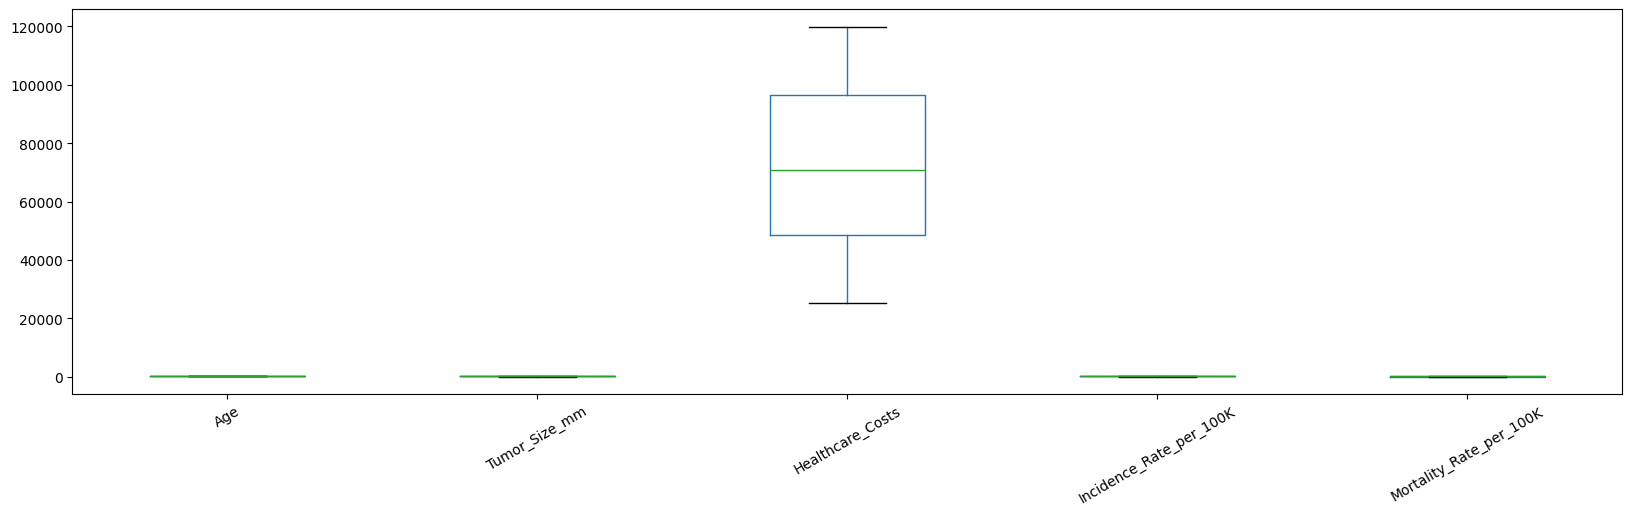

In [ ]:
traindata[num_cols].boxplot(grid=False, figsize=(20,5), rot=30)
plt.show()

In [ ]:
cat_cols = [column for column in traindata.columns if traindata[column].dtypes == object]
cat_cols

['Country',
 'Gender',
 'Cancer_Stage',
 'Family_History',
 'Smoking_History',
 'Alcohol_Consumption',
 'Obesity_BMI',
 'Diet_Risk',
 'Physical_Activity',
 'Diabetes',
 'Inflammatory_Bowel_Disease',
 'Genetic_Mutation',
 'Screening_History',
 'Early_Detection',
 'Treatment_Type',
 'Survival_5_years',
 'Urban_or_Rural',
 'Economic_Classification',
 'Healthcare_Access',
 'Insurance_Status']

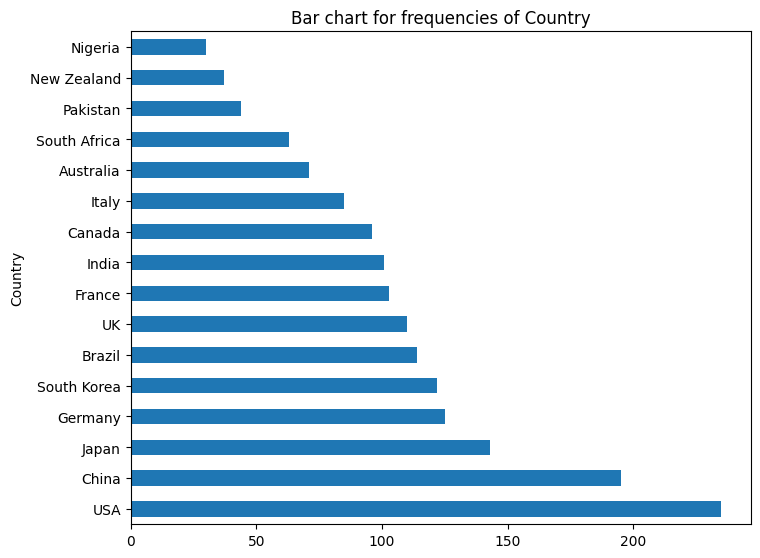

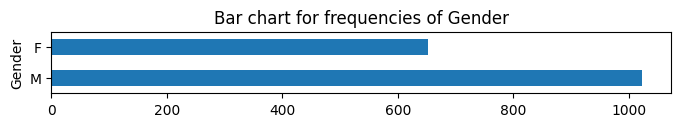

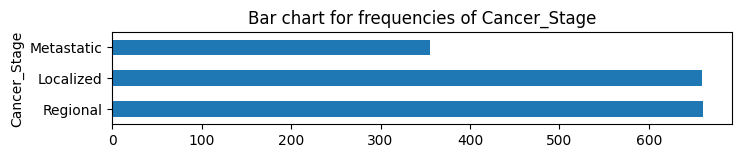

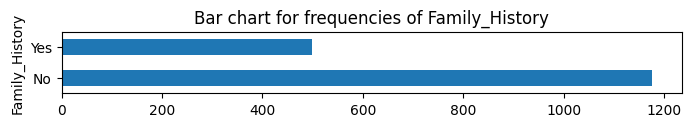

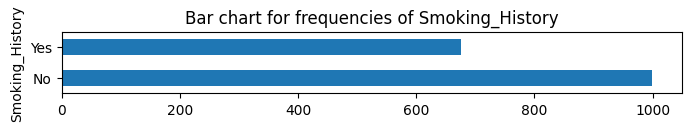

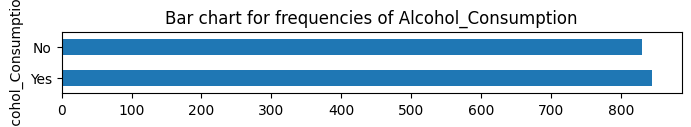

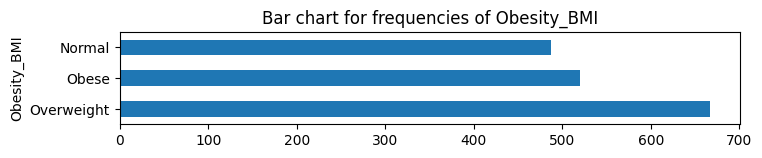

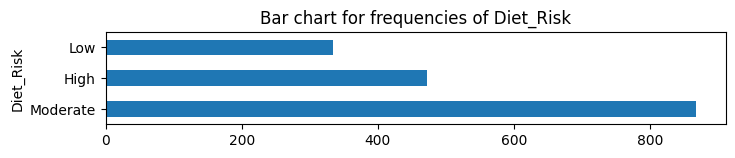

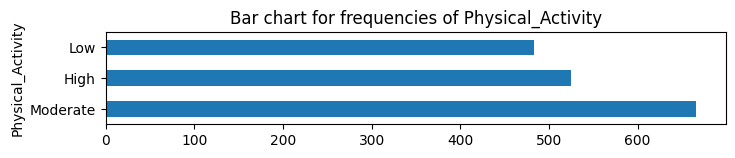

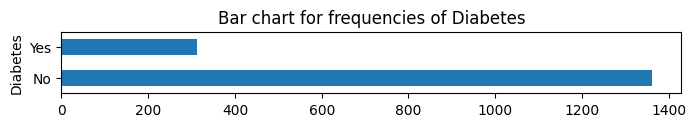

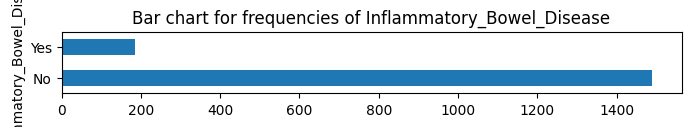

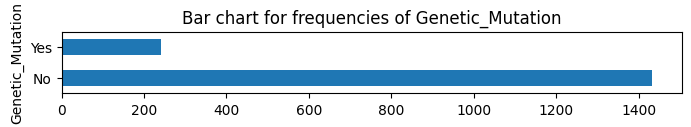

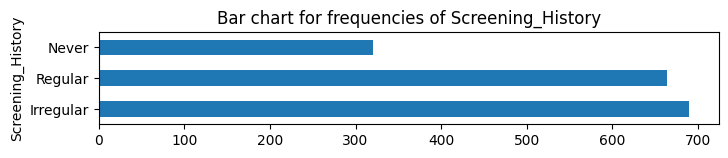

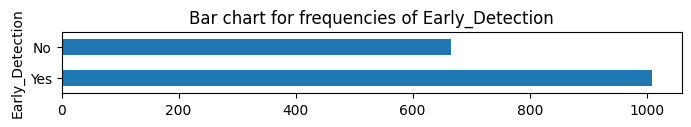

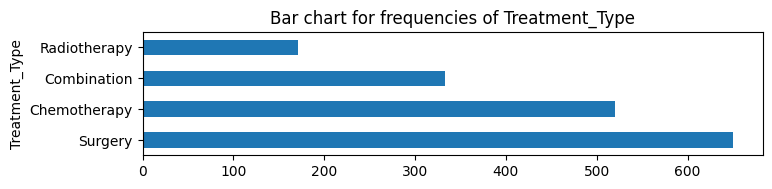

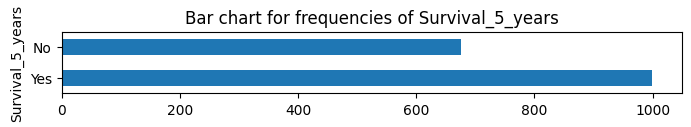

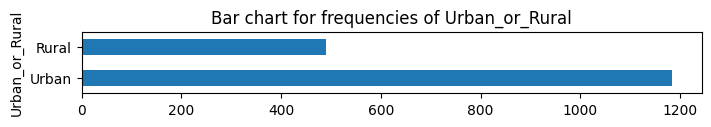

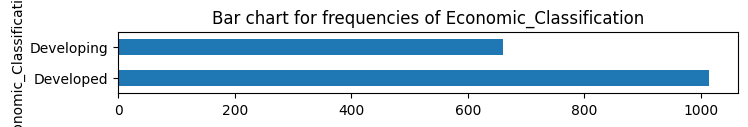

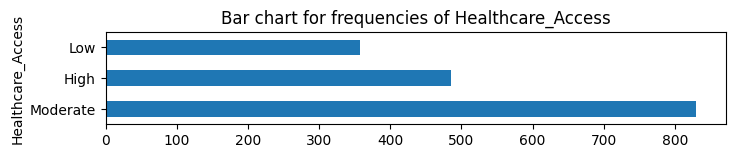

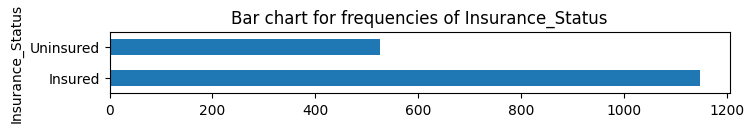

In [ ]:
for col in cat_cols:
    freq_table = traindata[col].value_counts()
    plt.figure(figsize = (8,len(freq_table)*0.4))
    freq_table.plot.barh(title='Bar chart for frequencies of ' + col)
    plt.show()
    print()

In [ ]:
num_cols = ['Tumor_Size_mm','Healthcare_Costs','Incidence_Rate_per_100K','Mortality_Rate_per_100K']
log_cols = ['Age']
cat_cols = ['Country','Gender','Cancer_Stage','Family_History','Smoking_History','Alcohol_Consumption','Obesity_BMI','Diet_Risk','Physical_Activity','Diabetes','Inflammatory_Bowel_Disease','Genetic_Mutation','Screening_History','Early_Detection','Treatment_Type','Urban_or_Rural','Economic_Classification','Healthcare_Access','Insurance_Status']
target = 'Survival_5_years'

from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ('standardize', StandardScaler())
])

def log_transformation(x):
    return np.log(x+0.1)

log_pipeline = Pipeline([
    ('log transform', FunctionTransformer(log_transformation)),
    ('standardize', StandardScaler())])

processing_pipeline = ColumnTransformer([
    ('numeric', num_pipeline, num_cols),
    ('log', log_pipeline, log_cols),
    ('class', OneHotEncoder(max_categories=5, handle_unknown='infrequent_if_exist'), cat_cols)
  ])

In [ ]:
processing_pipeline

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('standardize',
                                                  StandardScaler())]),
                                 ['Tumor_Size_mm', 'Healthcare_Costs',
                                  'Incidence_Rate_per_100K',
                                  'Mortality_Rate_per_100K']),
                                ('log',
                                 Pipeline(steps=[('log transform',
                                                  FunctionTransformer(func=<function log_transformation at 0x7997ff59cae0>)),
                                                 ('standardize',
                                                  StandardScaler())]),
                                 ['Age']),
                                ('class',
                                 On...
                                               max_categories=5),
                                 ['Country', 'Gender', 'Cancer_Stage',
                                  'Family_History', 'Smoking_History',
                                  'Alcohol_Consumption', 'Obesity_BMI',
                                  'Diet_Risk', 'Physical_Activity', 'Diabetes',
                                  'Inflammatory_Bowel_Disease',
                                  'Genetic_Mutation', 'Screening_History',
                                  'Early_Detection', 'Treatment_Type',
                                  'Urban_or_Rural', 'Economic_Classification',
                                  'Healthcare_Access', 'Insurance_Status'])])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

logistic_pipeline = Pipeline([
    ('processing', processing_pipeline),
    ('logistic', LogisticRegression(max_iter = 5000, solver = 'saga'))
])

param_grid = [
    {'logistic__penalty' : ['l2', 'l1'],
     'logistic__C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'logistic__penalty' : ['elasticnet'],
     'logistic__C': [0.001, 0.01, 0.1, 1, 10, 100],
     'logistic__l1_ratio' : [0.1, 0.25, 0.5, 0.75, 0.9]}
]

grid_search = GridSearchCV(logistic_pipeline, param_grid, cv=5, scoring='accuracy', return_train_score=True)

grid_search.fit(traindata.drop(columns=[target]), traindata[target])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('processing',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('standardize',
                                                                                          StandardScaler())]),
                                                                         ['Tumor_Size_mm',
                                                                          'Healthcare_Costs',
                                                                          'Incidence_Rate_per_100K',
                                                                          'Mortality_Rate_per_100K']),
                                                                        ('log',
                                                                         Pipeline(steps=[('log '
                                                                                          'transform',
                                                                                          FunctionTransformer(func=<function log_transformation at 0x7997ff59cae...
                                                                          'Healthcare_Access',
                                                                          'Insurance_Status'])])),
                                       ('logistic',
                                        LogisticRegression(max_iter=5000,
                                                           solver='saga'))]),
             param_grid=[{'logistic__C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'logistic__penalty': ['l2', 'l1']},
                         {'logistic__C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'logistic__l1_ratio': [0.1, 0.25, 0.5, 0.75, 0.9],
                          'logistic__penalty': ['elasticnet']}],
             return_train_score=True, scoring='accuracy')

In [ ]:
grid_search.best_estimator_

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardize',
                                                                   StandardScaler())]),
                                                  ['Tumor_Size_mm',
                                                   'Healthcare_Costs',
                                                   'Incidence_Rate_per_100K',
                                                   'Mortality_Rate_per_100K']),
                                                 ('log',
                                                  Pipeline(steps=[('log '
                                                                   'transform',
                                                                   FunctionTransformer(func=<function log_transformation at 0x7997ff59cae0>)),
                                                                  ('standardize',
                                                                   Standard...
                                                   'Obesity_BMI', 'Diet_Risk',
                                                   'Physical_Activity',
                                                   'Diabetes',
                                                   'Inflammatory_Bowel_Disease',
                                                   'Genetic_Mutation',
                                                   'Screening_History',
                                                   'Early_Detection',
                                                   'Treatment_Type',
                                                   'Urban_or_Rural',
                                                   'Economic_Classification',
                                                   'Healthcare_Access',
                                                   'Insurance_Status'])])),
                ('logistic',
                 LogisticRegression(C=0.1, l1_ratio=0.25, max_iter=5000,
                                    penalty='elasticnet', solver='saga'))])

In [ ]:
grid_search.best_score_

np.float64(0.603946733398874)

In [ ]:
grid_search.score(testdata.drop(columns=[target]), testdata[target])

0.5858596214035448

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svc = Pipeline([
    ('processing', processing_pipeline),
    ('svc', SVC())
])

param_grid = [
    {'svc__kernel':['linear'],
     'svc__C' : [0.001, 0.1, 1, 10, 100]},
    {'svc__kernel':['poly'],
     'svc__degree' : [2, 3],
     'svc__C' : [0.001, 0.1, 1, 10, 100]},
    {'svc__kernel':['rbf'],
     'svc__gamma' : [0.001, 0.01, 0.1, 1, 10, 100],
     'svc__C' : [0.001, 0.01, 0.1, 1, 10, 100]}
]

grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(traindata.drop(columns=[target]), traindata[target])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('processing',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('standardize',
                                                                                          StandardScaler())]),
                                                                         ['Tumor_Size_mm',
                                                                          'Healthcare_Costs',
                                                                          'Incidence_Rate_per_100K',
                                                                          'Mortality_Rate_per_100K']),
                                                                        ('log',
                                                                         Pipeline(steps=[('log '
                                                                                          'transform',
                                                                                          FunctionTransformer(func=<function log_transformation at 0x7997ff59cae...
                                                                          'Economic_Classification',
                                                                          'Healthcare_Access',
                                                                          'Insurance_Status'])])),
                                       ('svc', SVC())]),
             param_grid=[{'svc__C': [0.001, 0.1, 1, 10, 100],
                          'svc__kernel': ['linear']},
                         {'svc__C': [0.001, 0.1, 1, 10, 100],
                          'svc__degree': [2, 3], 'svc__kernel': ['poly']},
                         {'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                          'svc__kernel': ['rbf']}],
             return_train_score=True, scoring='accuracy')

In [ ]:
grid_search.best_estimator_

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardize',
                                                                   StandardScaler())]),
                                                  ['Tumor_Size_mm',
                                                   'Healthcare_Costs',
                                                   'Incidence_Rate_per_100K',
                                                   'Mortality_Rate_per_100K']),
                                                 ('log',
                                                  Pipeline(steps=[('log '
                                                                   'transform',
                                                                   FunctionTransformer(func=<function log_transformation at 0x7997ff59cae0>)),
                                                                  ('standardize',
                                                                   Standard...
                                                   'Cancer_Stage',
                                                   'Family_History',
                                                   'Smoking_History',
                                                   'Alcohol_Consumption',
                                                   'Obesity_BMI', 'Diet_Risk',
                                                   'Physical_Activity',
                                                   'Diabetes',
                                                   'Inflammatory_Bowel_Disease',
                                                   'Genetic_Mutation',
                                                   'Screening_History',
                                                   'Early_Detection',
                                                   'Treatment_Type',
                                                   'Urban_or_Rural',
                                                   'Economic_Classification',
                                                   'Healthcare_Access',
                                                   'Insurance_Status'])])),
                ('svc', SVC(C=100, gamma=0.001))])

In [ ]:
grid_search.best_score_

np.float64(0.5973706318705871)

In [ ]:
grid_search.score(testdata.drop(columns=[target]), testdata[target])

0.5993619702936264

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = Pipeline([
    ('processing', processing_pipeline),
    ('rfc', RandomForestClassifier())
])


data_size = traindata.shape[0]
n_features = processing_pipeline.fit_transform(traindata).shape[1]

param_grid = {
    'rfc__n_estimators' : [10, 25, 50],
    'rfc__max_depth' : [4, 5, 6],
    'rfc__min_samples_split' : [data_size//50, data_size//25, data_size//15, data_size//10],
    'rfc__min_samples_leaf' : [data_size//50, data_size//25, data_size//15, data_size//10],
    'rfc__max_features' : [n_features//4, n_features//3, n_features//2, n_features],
    'rfc__max_leaf_nodes' : [5, 10, 15, 20]
}

grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='accuracy', return_train_score=True)

grid_search.fit(traindata.drop(columns=[target]), traindata[target])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('processing',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('standardize',
                                                                                          StandardScaler())]),
                                                                         ['Tumor_Size_mm',
                                                                          'Healthcare_Costs',
                                                                          'Incidence_Rate_per_100K',
                                                                          'Mortality_Rate_per_100K']),
                                                                        ('log',
                                                                         Pipeline(steps=[('log '
                                                                                          'transform',
                                                                                          FunctionTransformer(func=<function log_transformation at 0x7997ff59cae...
                                                                          'Economic_Classification',
                                                                          'Healthcare_Access',
                                                                          'Insurance_Status'])])),
                                       ('rfc', RandomForestClassifier())]),
             param_grid={'rfc__max_depth': [4, 5, 6],
                         'rfc__max_features': [13, 18, 27, 54],
                         'rfc__max_leaf_nodes': [5, 10, 15, 20],
                         'rfc__min_samples_leaf': [33, 66, 111, 167],
                         'rfc__min_samples_split': [33, 66, 111, 167],
                         'rfc__n_estimators': [10, 25, 50]},
             return_train_score=True, scoring='accuracy')

In [ ]:
grid_search.best_estimator_

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardize',
                                                                   StandardScaler())]),
                                                  ['Tumor_Size_mm',
                                                   'Healthcare_Costs',
                                                   'Incidence_Rate_per_100K',
                                                   'Mortality_Rate_per_100K']),
                                                 ('log',
                                                  Pipeline(steps=[('log '
                                                                   'transform',
                                                                   FunctionTransformer(func=<function log_transformation at 0x7997ff59cae0>)),
                                                                  ('standardize',
                                                                   Standard...
                                                   'Physical_Activity',
                                                   'Diabetes',
                                                   'Inflammatory_Bowel_Disease',
                                                   'Genetic_Mutation',
                                                   'Screening_History',
                                                   'Early_Detection',
                                                   'Treatment_Type',
                                                   'Urban_or_Rural',
                                                   'Economic_Classification',
                                                   'Healthcare_Access',
                                                   'Insurance_Status'])])),
                ('rfc',
                 RandomForestClassifier(max_depth=6, max_features=27,
                                        max_leaf_nodes=10, min_samples_leaf=33,
                                        min_samples_split=167,
                                        n_estimators=10))])

In [ ]:
grid_search.best_score_

np.float64(0.6045312360353918)

In [ ]:
grid_search.score(testdata.drop(columns=[target]), testdata[target])

0.5944229690694295

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer

dtc = Pipeline([
    ('processing', processing_pipeline),
    ('dtc', DecisionTreeClassifier())
])

data_size = traindata.shape[0]
n_features = processing_pipeline.fit_transform(traindata).shape[1]

param_grid = {
    'dtc__max_depth' : [3, 4, 5],
    'dtc__min_samples_split' : [data_size//20, data_size//15, data_size//10, data_size//5],
    'dtc__min_samples_leaf' : [data_size//20, data_size//15, data_size//10, data_size//5],
    'dtc__max_features' : [n_features//4, n_features//3, n_features//2, n_features],
    'dtc__max_leaf_nodes' : [5, 10, 15, 20]
}

f1_scorer = make_scorer(f1_score,pos_label = 'Yes')



grid_search = GridSearchCV(dtc, param_grid, cv=5, scoring= f1_scorer , return_train_score=True)
grid_search.fit(traindata,traindata[target])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('processing',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('standardize',
                                                                                          StandardScaler())]),
                                                                         ['Tumor_Size_mm',
                                                                          'Healthcare_Costs',
                                                                          'Incidence_Rate_per_100K',
                                                                          'Mortality_Rate_per_100K']),
                                                                        ('log',
                                                                         Pipeline(steps=[('log '
                                                                                          'transform',
                                                                                          FunctionTransformer(func=<function log_transformation at 0x7997ff59cae...
                                                                          'Healthcare_Access',
                                                                          'Insurance_Status'])])),
                                       ('dtc', DecisionTreeClassifier())]),
             param_grid={'dtc__max_depth': [3, 4, 5],
                         'dtc__max_features': [13, 18, 27, 54],
                         'dtc__max_leaf_nodes': [5, 10, 15, 20],
                         'dtc__min_samples_leaf': [83, 111, 167, 334],
                         'dtc__min_samples_split': [83, 111, 167, 334]},
             return_train_score=True,
             scoring=make_scorer(f1_score, response_method='predict', pos_label=Yes))

In [ ]:
grid_search.best_estimator_

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardize',
                                                                   StandardScaler())]),
                                                  ['Tumor_Size_mm',
                                                   'Healthcare_Costs',
                                                   'Incidence_Rate_per_100K',
                                                   'Mortality_Rate_per_100K']),
                                                 ('log',
                                                  Pipeline(steps=[('log '
                                                                   'transform',
                                                                   FunctionTransformer(func=<function log_transformation at 0x7997ff59cae0>)),
                                                                  ('standardize',
                                                                   Standard...
                                                   'Obesity_BMI', 'Diet_Risk',
                                                   'Physical_Activity',
                                                   'Diabetes',
                                                   'Inflammatory_Bowel_Disease',
                                                   'Genetic_Mutation',
                                                   'Screening_History',
                                                   'Early_Detection',
                                                   'Treatment_Type',
                                                   'Urban_or_Rural',
                                                   'Economic_Classification',
                                                   'Healthcare_Access',
                                                   'Insurance_Status'])])),
                ('dtc',
                 DecisionTreeClassifier(max_depth=3, max_features=13,
                                        max_leaf_nodes=5, min_samples_leaf=167,
                                        min_samples_split=83))])

In [ ]:
grid_search.best_score_

np.float64(0.7474741807087373)

In [ ]:
grid_search.score(testdata.drop(columns=[target]), testdata[target])

0.7495013404421386

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

mlp_pipeline = Pipeline([
    ('processing', processing_pipeline),
    ('mlp', MLPClassifier(max_iter=2000))
])

n_features = processing_pipeline.fit_transform(traindata).shape[1]

param_grid = [{
    'mlp__hidden_layer_sizes' : [[n_features,n_features],
                                [n_features,n_features,n_features],
                                [n_features//2,n_features//2],
                                [n_features//2,n_features//2,n_features//2],
                                [n_features*2,n_features*2],
                                [n_features*2,n_features*2,n_features*2]],
    'mlp__alpha' : [0.001, 0.01, 0.1, 1, 10]
}]

f1_scorer = make_scorer(f1_score,pos_label = 'Yes')

grid_search = GridSearchCV(mlp_pipeline, param_grid, cv=3, scoring=f1_scorer, return_train_score=True)

grid_search.fit(traindata.drop(columns=[target]), traindata[target])

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('processing',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('standardize',
                                                                                          StandardScaler())]),
                                                                         ['Tumor_Size_mm',
                                                                          'Healthcare_Costs',
                                                                          'Incidence_Rate_per_100K',
                                                                          'Mortality_Rate_per_100K']),
                                                                        ('log',
                                                                         Pipeline(steps=[('log '
                                                                                          'transform',
                                                                                          FunctionTransformer(func=<function log_transformation at 0x7997ff59cae...
                                                                          'Urban_or_Rural',
                                                                          'Economic_Classification',
                                                                          'Healthcare_Access',
                                                                          'Insurance_Status'])])),
                                       ('mlp', MLPClassifier(max_iter=2000))]),
             param_grid=[{'mlp__alpha': [0.001, 0.01, 0.1, 1, 10],
                          'mlp__hidden_layer_sizes': [[54, 54], [54, 54, 54],
                                                      [27, 27], [27, 27, 27],
                                                      [108, 108],
                                                      [108, 108, 108]]}],
             return_train_score=True,
             scoring=make_scorer(f1_score, response_method='predict', pos_label=Yes))

In [ ]:
grid_search.best_estimator_

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardize',
                                                                   StandardScaler())]),
                                                  ['Tumor_Size_mm',
                                                   'Healthcare_Costs',
                                                   'Incidence_Rate_per_100K',
                                                   'Mortality_Rate_per_100K']),
                                                 ('log',
                                                  Pipeline(steps=[('log '
                                                                   'transform',
                                                                   FunctionTransformer(func=<function log_transformation at 0x7997ff59cae0>)),
                                                                  ('standardize',
                                                                   Standard...
                                                   'Smoking_History',
                                                   'Alcohol_Consumption',
                                                   'Obesity_BMI', 'Diet_Risk',
                                                   'Physical_Activity',
                                                   'Diabetes',
                                                   'Inflammatory_Bowel_Disease',
                                                   'Genetic_Mutation',
                                                   'Screening_History',
                                                   'Early_Detection',
                                                   'Treatment_Type',
                                                   'Urban_or_Rural',
                                                   'Economic_Classification',
                                                   'Healthcare_Access',
                                                   'Insurance_Status'])])),
                ('mlp',
                 MLPClassifier(alpha=10, hidden_layer_sizes=[54, 54],
                               max_iter=2000))])

In [ ]:
grid_search.best_score_

np.float64(0.7474747474747475)

In [ ]:
grid_search.score(testdata.drop(columns=[target]), testdata[target])

0.7495013404421386

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer


gbc = Pipeline([
    ('processing', processing_pipeline),
    ('gbc', GradientBoostingClassifier())
])

data_size = traindata.shape[0]
n_features = processing_pipeline.fit_transform(traindata).shape[1]


param_grid = [{
    'gbc__n_estimators' : [5, 10, 20],
    'gbc__max_depth' : [5,10,20],
    'gbc__min_samples_split' : [data_size//20, data_size//15, data_size//10, data_size//5],
    'gbc__min_samples_leaf' : [data_size//20, data_size//15, data_size//10, data_size//5]
    }]

f1_scorer = make_scorer(f1_score,pos_label = 'Yes')

grid_search = GridSearchCV(gbc, param_grid, cv=5, scoring=f1_scorer , return_train_score=True)

grid_search.fit(traindata.drop(columns=[target]), traindata[target])


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('processing',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('standardize',
                                                                                          StandardScaler())]),
                                                                         ['Tumor_Size_mm',
                                                                          'Healthcare_Costs',
                                                                          'Incidence_Rate_per_100K',
                                                                          'Mortality_Rate_per_100K']),
                                                                        ('log',
                                                                         Pipeline(steps=[('log '
                                                                                          'transform',
                                                                                          FunctionTransformer(func=<function log_transformation at 0x7997ff59cae...
                                                                          'Economic_Classification',
                                                                          'Healthcare_Access',
                                                                          'Insurance_Status'])])),
                                       ('gbc', GradientBoostingClassifier())]),
             param_grid=[{'gbc__max_depth': [5, 10, 20],
                          'gbc__min_samples_leaf': [83, 111, 167, 334],
                          'gbc__min_samples_split': [83, 111, 167, 334],
                          'gbc__n_estimators': [5, 10, 20]}],
             return_train_score=True,
             scoring=make_scorer(f1_score, response_method='predict', pos_label=Yes))

In [ ]:
grid_search.best_estimator_

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardize',
                                                                   StandardScaler())]),
                                                  ['Tumor_Size_mm',
                                                   'Healthcare_Costs',
                                                   'Incidence_Rate_per_100K',
                                                   'Mortality_Rate_per_100K']),
                                                 ('log',
                                                  Pipeline(steps=[('log '
                                                                   'transform',
                                                                   FunctionTransformer(func=<function log_transformation at 0x7997ff59cae0>)),
                                                                  ('standardize',
                                                                   Standard...
                                                   'Obesity_BMI', 'Diet_Risk',
                                                   'Physical_Activity',
                                                   'Diabetes',
                                                   'Inflammatory_Bowel_Disease',
                                                   'Genetic_Mutation',
                                                   'Screening_History',
                                                   'Early_Detection',
                                                   'Treatment_Type',
                                                   'Urban_or_Rural',
                                                   'Economic_Classification',
                                                   'Healthcare_Access',
                                                   'Insurance_Status'])])),
                ('gbc',
                 GradientBoostingClassifier(max_depth=5, min_samples_leaf=83,
                                            min_samples_split=83,
                                            n_estimators=5))])

In [ ]:
grid_search.best_score_

np.float64(0.7474741807087373)

In [ ]:
grid_search.score(testdata.drop(columns=[target]), testdata[target])

0.7495013404421386